# Hierarchical Data, the JSON Data Format, and APIs

In [2]:
import pandas as pd

## Shows Data

First we'll work with the "Girls" shows JSON data from the reading.

In [3]:
# Fetch data from a URL
import requests
response = requests.get("https://dlsun.github.io/pods/data/tvshows.json")

import json
data_shows = response.json()

In [4]:
df_shows = pd.json_normalize(data_shows)
df_shows

,id,url,name,type,language,genres,status,runtime,premiered,officialSite,...,externals.thetvdb,externals.imdb,image.medium,image.original,network,webChannel.id,webChannel.name,webChannel.country.name,webChannel.country.code,webChannel.country.timezone
0,139,http://www.tvmaze.com/shows/139/girls,Girls,Scripted,English,"[Drama, Romance]",Ended,30,2012-04-15,http://www.hbo.com/girls,...,220411,tt1723816,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
1,722,http://www.tvmaze.com/shows/722/the-golden-girls,The Golden Girls,Scripted,English,"[Drama, Comedy]",Ended,30,1985-09-14,None,...,71292,tt0088526,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
2,23542,http://www.tvmaze.com/shows/23542/good-girls,Good Girls,Scripted,English,"[Drama, Comedy, Crime]",Running,60,2018-02-26,https://www.nbc.com/good-girls?nbc=1,...,328577,tt6474378,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
3,6771,http://www.tvmaze.com/shows/6771/the-powerpuff...,The Powerpuff Girls,Animation,English,"[Comedy, Action, Science-Fiction]",Running,15,2016-04-04,https://www.cartoonnetwork.com/video/powerpuff...,...,307473,tt4718304,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
4,42726,http://www.tvmaze.com/shows/42726/florida-girls,Florida Girls,Scripted,English,[Comedy],Running,30,2019-07-10,https://poptv.com/floridagirls,...,363682,tt8548870,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
5,32087,http://www.tvmaze.com/shows/32087/chicken-girls,Chicken Girls,Scripted,English,"[Drama, Children, Music]",Running,16,2017-09-05,https://www.youtube.com/playlist?list=PLVewHiZ...,...,339854,None,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,274.0,Brat,United States,US,America/New_York
6,33320,http://www.tvmaze.com/shows/33320/derry-girls,Derry Girls,Scripted,English,[Comedy],Running,30,2018-01-04,http://www.channel4.com/programmes/derry-girls,...,338903,tt7120662,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
7,1955,http://www.tvmaze.com/shows/1955/the-powerpuff...,The Powerpuff Girls,Animation,English,"[Action, Children, Crime]",Ended,30,1998-11-18,None,...,76200,tt0175058,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
8,1073,http://www.tvmaze.com/shows/1073/bomb-girls,Bomb Girls,Scripted,English,"[Drama, Romance, War]",Ended,60,2012-01-04,None,...,254378,tt1955311,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN
9,525,http://www.tvmaze.com/shows/525/gilmore-girls,Gilmore Girls,Scripted,English,"[Drama, Comedy, Romance]",Ended,60,2000-10-05,None,...,76568,tt0238784,http://static.tvmaze.com/uploads/images/medium...,http://static.tvmaze.com/uploads/images/origin...,NaN,NaN,NaN,NaN,NaN,NaN


1\. Summarize the networks represented by these shows and the number of these shows that aired on each network.

In [5]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_shows["network.name"].value_counts()


network.name
NBC                2
Cartoon Network    2
HBO                1
Pop                1
Channel 4          1
Global             1
The CW             1
Name: count, dtype: int64

In [6]:
df_shows.groupby("network.name")["name"].value_counts()

network.name     name               
Cartoon Network  The Powerpuff Girls    2
Channel 4        Derry Girls            1
Global           Bomb Girls             1
HBO              Girls                  1
NBC              Good Girls             1
                 The Golden Girls       1
Pop              Florida Girls          1
The CW           Gilmore Girls          1
Name: count, dtype: int64

2\. Find the number of seasons for each show in the data. Do this two ways: one which uses `df_shows`, and another that first flattens `data_shows` to a different data frame.

In [7]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_shows["num_seasons"] = df_shows["seasons"].apply(len)
df_shows[['name', 'num_seasons']]

,name,num_seasons
0,Girls,6
1,The Golden Girls,7
2,Good Girls,3
3,The Powerpuff Girls,3
4,Florida Girls,1
5,Chicken Girls,5
6,Derry Girls,2
7,The Powerpuff Girls,6
8,Bomb Girls,2
9,Gilmore Girls,8


In [8]:
df_season = pd.json_normalize(data_shows, "seasons", meta="name", meta_prefix="show.")

In [9]:
df_season.groupby("show.name")["number"].count()
# or
# df_season.groupby("show.name").size()

show.name
Bomb Girls             2
Chicken Girls          5
Derry Girls            2
Florida Girls          1
Gilmore Girls          8
Girls                  6
Good Girls             3
The Golden Girls       7
The Powerpuff Girls    9
Name: number, dtype: int64

3\. For each episode, find the length (number of characters) of the title. Then create summaries to answer: Which show tends to have the longest episode titles? The shortest? Which show has the most variability in lengths of episode titles? The least?

In [10]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_episode = pd.json_normalize(data_shows, ["seasons", "episodes"], meta="name", meta_prefix="show.")
df_episode["title_length"] = df_episode["name"].apply(len)
df_title_len = df_episode[["name", "title_length"]]
df_title_len

,name,title_length
0,Pilot,5
1,Vagina Panic,12
2,All Adventurous Women Do,24
3,Hannah's Diary,14
4,Hard Being Easy,15
...,...,...
736,Hay Bale Maze,13
737,It's Just Like Riding a Bike,28
738,Lorelai? Lorelai?,17
739,Unto the Breach,15


In [11]:
# find the longest episode title
df_title_len.sort_values(by="title_length", ascending=False).head(1)

,name,title_length
420,Birds of a Feather | Official Lyric Video | Th...,70


In [12]:
# find the shortest episode title
df_title_len.sort_values(by="title_length", ascending=True).head(1)

,name,title_length
28,Flo,3


In [13]:
# which show had the most variable episode title lengths?
df_episode.groupby("show.name")["title_length"].std().sort_values(ascending=False).head(1)

show.name
Chicken Girls    10.739752
Name: title_length, dtype: float64

In [14]:
df_episode.groupby("show.name")["title_length"].std().sort_values(ascending=True).head(1)

show.name
Bomb Girls    3.701588
Name: title_length, dtype: float64

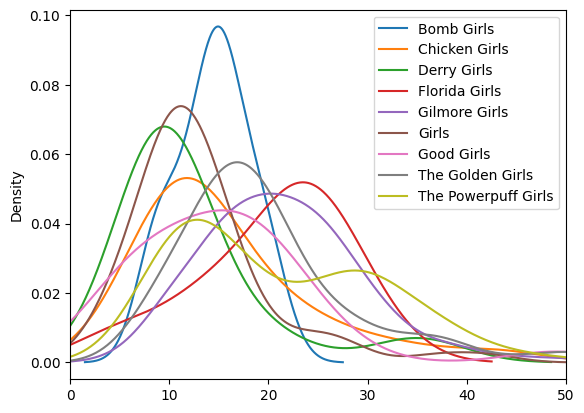

In [29]:
df_episode.groupby("show.name")["title_length"].plot.density(legend = True, xlim = (0, 50));

4\. Do any cast members in the data set share a birthday with you? Who, and what show are they on? (If there isn't anyone, see if anyone shares a birthday with Lena Dunham.)

In [15]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_cast = pd.json_normalize(data_shows, "cast", meta="name", meta_prefix="show.")
df_cast["share"] = df_cast["person.birthday"] == "2002-12-07"
df_share = df_cast[df_cast["share"] == True]
df_share

,self,voice,person.id,person.url,person.name,person.country.name,person.country.code,person.country.timezone,person.birthday,person.deathday,...,person.image.original,character.id,character.url,character.name,character.image.medium,character.image.original,person.country,character.image,show.name,share


## TVMaze API

Now you will work with the [TVMaze API](http://www.tvmaze.com/api) from the reading. Use the API to request JSON data that you can use to answer the following questions.

1\. What was the longest show that aired in the U.S. on February 3, 2019?

(_Hint:_ Use the ["Schedule" endpoint](http://www.tvmaze.com/api#schedule).)

In [16]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
response = requests.get("http://api.tvmaze.com/schedule?country=US&date=2019-02-03")
data_shows = response.json()

str(data_shows)[:1000]


"[{'id': 1607800, 'url': 'https://www.tvmaze.com/episodes/1607800/1st-look-10x13-destination-park-city', 'name': 'Destination Park City', 'season': 10, 'number': 13, 'type': 'regular', 'airdate': '2019-02-02', 'airtime': '01:02', 'airstamp': '2019-02-03T06:02:00+00:00', 'runtime': 30, 'rating': {'average': None}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/197/494955.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/197/494955.jpg'}, 'summary': '<p>Good friends, grand aventures and great powder. Join guest host, Ben Higgins and his best buds as they get the first look at Park City, UT! </p>', 'show': {'id': 7795, 'url': 'https://www.tvmaze.com/shows/7795/1st-look', 'name': '1st Look', 'type': 'Reality', 'language': 'English', 'genres': ['Travel'], 'status': 'Running', 'runtime': 30, 'averageRuntime': 30, 'premiered': '2008-10-04', 'ended': None, 'officialSite': 'https://www.nbc.com/1st-look', 'schedule': {'time': '01:02', 

In [17]:
df_shows = pd.json_normalize(data_shows)
df_shows.sort_values(by="runtime", ascending=False).head(1)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,...,image,show._links.nextepisode.href,show.webChannel.id,show.webChannel.name,show.webChannel.country,show.webChannel.officialSite,show.network,show.webChannel.country.name,show.webChannel.country.code,show.webChannel.country.timezone
17,1603674,https://www.tvmaze.com/episodes/1603674/super-...,Super Bowl LIII - New England Patriots vs. Los...,2019,1.0,regular,2019-02-03,18:30,2019-02-03T23:30:00+00:00,180,...,NaN,https://api.tvmaze.com/episodes/1789770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2\. Among all shows that aired in the U.S. on Feburary 3, 2019, only one person appeared on more than one show. (You may find three people. Two of them actually appeared in two different roles on the same show.) Who was it?

Hint: You will need to write a loop. Use the "show.id" from the data above, and use the ["Shows" endpoint](http://www.tvmaze.com/api#show-cast) to get the cast of each show. Don't forget to stagger your requests, or you will be blocked by the website!

In [18]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
import time

people = []
for show_id in df_shows["show.id"]:
    response = requests.get(f"http://api.tvmaze.com/shows/{show_id}/cast")
    people.extend(response.json())
    time.sleep(0.5)

df_cast = pd.json_normalize(people, meta="name", meta_prefix="show.")
df_cast

,self,voice,person.id,person.url,person.name,person.country.name,person.country.code,person.country.timezone,person.birthday,person.deathday,...,person._links.self.href,character.id,character.url,character.name,character.image.medium,character.image.original,character._links.self.href,person.country,person.image,character.image
0,True,False,117627,https://www.tvmaze.com/people/117627/johnny-de...,Johnny Devenanzio,United States,US,America/New_York,1982-06-22,None,...,https://api.tvmaze.com/people/117627,627654,https://www.tvmaze.com/characters/627654/1st-l...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/627654,NaN,NaN,NaN
1,True,False,132602,https://www.tvmaze.com/people/132602/angela-sun,Angela Sun,NaN,NaN,NaN,None,None,...,https://api.tvmaze.com/people/132602,627644,https://www.tvmaze.com/characters/627644/1st-l...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/627644,NaN,NaN,NaN
2,True,False,71115,https://www.tvmaze.com/people/71115/ashley-rob...,Ashley Roberts,United States,US,America/New_York,1981-09-14,None,...,https://api.tvmaze.com/people/71115,627646,https://www.tvmaze.com/characters/627646/1st-l...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/627646,NaN,NaN,NaN
3,True,False,51988,https://www.tvmaze.com/people/51988/audrina-pa...,Audrina Patridge,United States,US,America/New_York,1985-05-09,None,...,https://api.tvmaze.com/people/51988,251236,https://www.tvmaze.com/characters/251236/1st-l...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/251236,NaN,NaN,NaN
4,True,False,235612,https://www.tvmaze.com/people/235612/pedro-and...,Pedro Andrade,NaN,NaN,NaN,None,None,...,https://api.tvmaze.com/people/235612,627647,https://www.tvmaze.com/characters/627647/1st-l...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/627647,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,True,False,376488,https://www.tvmaze.com/people/376488/louis-cat...,Louis Cato and The Late Show Band!,United States,US,America/New_York,None,None,...,https://api.tvmaze.com/people/376488,273718,https://www.tvmaze.com/characters/273718/the-l...,House Band,NaN,NaN,https://api.tvmaze.com/characters/273718,NaN,NaN,NaN
191,True,False,65008,https://www.tvmaze.com/people/65008/jon-batiste,Jon Batiste,United States,US,America/New_York,1986-11-11,None,...,https://api.tvmaze.com/people/65008,404974,https://www.tvmaze.com/characters/404974/the-l...,Jon Batiste,NaN,NaN,https://api.tvmaze.com/characters/404974,NaN,NaN,NaN
192,True,False,354529,https://www.tvmaze.com/people/354529/louis-cato,Louis Cato,NaN,NaN,NaN,None,None,...,https://api.tvmaze.com/people/354529,1016412,https://www.tvmaze.com/characters/1016412/the-...,Louis Cato,NaN,NaN,https://api.tvmaze.com/characters/1016412,NaN,NaN,NaN
193,False,True,224095,https://www.tvmaze.com/people/224095/nils-fryk...,Nils Frykdahl,NaN,NaN,NaN,None,None,...,https://api.tvmaze.com/people/224095,584778,https://www.tvmaze.com/characters/584778/tigto...,Tigtone,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/584778,NaN,NaN,NaN


In [19]:
actor_counts = df_cast["person.name"].value_counts()

actor_counts

person.name
John Dickerson          2
Bridget Lancaster       2
Julia Collin Davison    2
Bobby Flay              2
Johnny Devenanzio       1
                       ..
Tom Brokaw              1
Jim Nantz               1
Tony Romo               1
Tracy Wolfson           1
Debi Derryberry         1
Name: count, Length: 191, dtype: int64

In [27]:
multiple_actors = actor_counts[df_cast["person.name"].value_counts() > 1]

multiple_actors

person.name
John Dickerson          2
Bridget Lancaster       2
Julia Collin Davison    2
Bobby Flay              2
Name: count, dtype: int64

In [28]:
df_cast[df_cast["person.name"].isin(multiple_actors.index)]

,self,voice,person.id,person.url,person.name,person.country.name,person.country.code,person.country.timezone,person.birthday,person.deathday,...,person._links.self.href,character.id,character.url,character.name,character.image.medium,character.image.original,character._links.self.href,person.country,person.image,character.image
16,True,False,86038,https://www.tvmaze.com/people/86038/julia-coll...,Julia Collin Davison,United States,US,America/New_York,None,None,...,https://api.tvmaze.com/people/86038,665732,https://www.tvmaze.com/characters/665732/ameri...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/665732,NaN,NaN,NaN
17,True,False,86039,https://www.tvmaze.com/people/86039/bridget-la...,Bridget Lancaster,United States,US,America/New_York,None,None,...,https://api.tvmaze.com/people/86039,665735,https://www.tvmaze.com/characters/665735/ameri...,Host,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/665735,NaN,NaN,NaN
20,True,False,86039,https://www.tvmaze.com/people/86039/bridget-la...,Bridget Lancaster,United States,US,America/New_York,None,None,...,https://api.tvmaze.com/people/86039,181462,https://www.tvmaze.com/characters/181462/ameri...,Chef,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/181462,NaN,NaN,NaN
25,True,False,86038,https://www.tvmaze.com/people/86038/julia-coll...,Julia Collin Davison,United States,US,America/New_York,None,None,...,https://api.tvmaze.com/people/86038,328884,https://www.tvmaze.com/characters/328884/ameri...,Chef,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/characters/328884,NaN,NaN,NaN
35,True,False,102424,https://www.tvmaze.com/people/102424/john-dick...,John Dickerson,United States,US,America/New_York,1968-07-06,None,...,https://api.tvmaze.com/people/102424,1159802,https://www.tvmaze.com/characters/1159802/cbs-...,Contributor,NaN,NaN,https://api.tvmaze.com/characters/1159802,NaN,NaN,NaN
58,True,False,102424,https://www.tvmaze.com/people/102424/john-dick...,John Dickerson,United States,US,America/New_York,1968-07-06,None,...,https://api.tvmaze.com/people/102424,206551,https://www.tvmaze.com/characters/206551/face-...,Host & Moderator,NaN,NaN,https://api.tvmaze.com/characters/206551,NaN,NaN,NaN
111,True,False,22338,https://www.tvmaze.com/people/22338/bobby-flay,Bobby Flay,United States,US,America/New_York,1964-12-10,None,...,https://api.tvmaze.com/people/22338,242654,https://www.tvmaze.com/characters/242654/worst...,Judge,NaN,NaN,https://api.tvmaze.com/characters/242654,NaN,NaN,NaN
182,True,False,22338,https://www.tvmaze.com/people/22338/bobby-flay,Bobby Flay,United States,US,America/New_York,1964-12-10,None,...,https://api.tvmaze.com/people/22338,126385,https://www.tvmaze.com/characters/126385/beat-...,Bobby Flay,NaN,NaN,https://api.tvmaze.com/characters/126385,NaN,NaN,NaN


# Tasty API

[Tasty.co](http://tasty.co) is a website and app that offers food recipes. They have made these recipes available through a [a REST API](https://rapidapi.com/apidojo/api/tasty). However, unlike the TVMaze API, this one requires authentication.

Specifically, you will need to sign up for a free account. You will then be provided with an API key that will need to be supplied with every request you make. This is used to track and limit usage.

Take a look at [the documentation](https://rapidapi.com/apidojo/api/tasty). We will use the recipes/list endpoint.

Make sure you are logged into the account you are created, and select the recipes/list endpoint from the menu at left. Now, take a look at the code snippet. By default, it provides Node.js code. Change this to Python (with the Requests library) to get you started.

If you need more help, [take a look at this doc](https://rapidapi.com/blog/tasty-api-with-java-python-php-ruby-javascript-examples/).

1\. Search for recipes containing "daikon" (an Asian radish) and request the JSON data.

In [33]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# search for the recipes containing "daikon" and request the JSON data
response = requests.get("https://tasty.p.rapidapi.com/recipes/list?from=0&size=20&tags=under_30_minutes&q=daikon", headers={
    'X-RapidAPI-Key': 'a797017e44msh71987bf08fae5c2p156012jsnde462d22610b',
    'X-RapidAPI-Host': 'tasty.p.rapidapi.com'
})
data_recipes = response.json()
data_recipes

{'count': 5,
 'results': [{'user_ratings': {'count_positive': 98,
    'score': 0.960784,
    'count_negative': 4},
   'tags': [{'root_tag_type': 'cuisine',
     'name': 'vietnamese',
     'id': 64461,
     'display_name': 'Vietnamese',
     'type': 'asian'},
    {'id': 64463,
     'display_name': 'Dairy-Free',
     'type': 'dietary',
     'root_tag_type': 'dietary',
     'name': 'dairy_free'},
    {'type': 'difficulty',
     'root_tag_type': 'difficulty',
     'name': 'easy',
     'id': 64471,
     'display_name': 'Easy'},
    {'display_name': 'Under 30 Minutes',
     'type': 'difficulty',
     'root_tag_type': 'difficulty',
     'name': 'under_30_minutes',
     'id': 64472},
    {'root_tag_type': 'meal',
     'name': 'dinner',
     'id': 64486,
     'display_name': 'Dinner',
     'type': 'meal'},
    {'type': 'meal',
     'root_tag_type': 'meal',
     'name': 'lunch',
     'id': 64489,
     'display_name': 'Lunch'},
    {'name': 'party',
     'id': 64503,
     'display_name': 'Party',

2\. How many recipes containing daikon are there? Which one is the cheapest per portion?

In [55]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
df_recipes = pd.json_normalize(data_recipes["results"])
len(df_recipes)

5

In [74]:
# which one is the cheapest per portion? - in column price.portion
df_recipes[df_recipes["price.portion"] == df_recipes["price.portion"].min()]

,tags,country,video_url,facebook_posts,id,slug,cook_time_minutes,is_one_top,servings_noun_plural,instructions,...,nutrition.protein,total_time_tier.display_tier,total_time_tier.tier,show.name,show.id,price.total,price.updated_at,price.portion,price.consumption_total,price.consumption_portion
1,"[{'type': 'asian', 'root_tag_type': 'cuisine',...",US,https://vid.tasty.co/output/118018/hls24_15438...,[],4621,low-carb-pad-thai,0.0,False,servings,"[{'position': 1, 'display_text': 'Trim the end...",...,23.0,Under 30 minutes,under_30_minutes,Goodful,34,2400,2023-10-13T07:02:33+02:00,400,950,150


3\. Find recipes containing avocado and request the JSON data.

**Hint:** Note that there are hundreds of results, but the API only returns 20 results by default and only 40 results maximum, even if you specify the `size=` parameter, so you will need to use a `for` loop, incrementing the `from=` parameter. Be sure to respect the API's rate limits (or you may be blocked!)

**Note:** Recall from the example in the reading that we created an empty list `episodes = []` and then added the results of each request to it in the for loop with `episodes.extend(response.json())`. But note that in the recipes/list endpoint there are two keys: count and results. We only want the results so try instead `.extend(response.json()).get("results")`.

**Suggestion:** Try writing a loop that only makes 2 or 3 requests first so you can test that it's working correctly. Also, make sure you use separate cells for code that makes requests to the API versus processing of the results; you don't want to rerun the requests unless absolutely necessary!

In [93]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# find recipes containing avocado and request the JSON data
avocado = []
for i in range(0, 100, 20):
    response = requests.get(f"https://tasty.p.rapidapi.com/recipes/list?from={i}&size=20&tags=under_30_minutes&q=avocado", headers={
        'X-RapidAPI-Key': 'a797017e44msh71987bf08fae5c2p156012jsnde462d22610b',
        'X-RapidAPI-Host': 'tasty.p.rapidapi.com'
    })
    avocado.extend(response.json()["results"])
    time.sleep(0.5)


In [94]:
df_avocado = pd.json_normalize(avocado)
df_avocado

,buzz_id,draft_status,instructions,seo_path,topics,country,brand,yields,facebook_posts,tags,...,nutrition.protein,price.consumption_portion,price.total,price.updated_at,price.portion,price.consumption_total,total_time_tier.tier,total_time_tier.display_tier,show.name,show.id
0,NaN,published,[{'display_text': 'In a blender or food proces...,"9295813,64486,9299514","[{'name': 'Bread Lovers', 'slug': 'bread'}, {'...",US,None,Servings: 4,[],"[{'root_tag_type': 'cuisine', 'name': 'north_a...",...,29.0,250,1900,2023-10-13T07:14:10+02:00,450,950,under_30_minutes,Under 30 minutes,Goodful,34
1,NaN,published,"[{'start_time': 0, 'appliance': None, 'end_tim...","8757513,9295874,64453","[{'name': 'Easy Dinner', 'slug': 'easy-dinner'...",US,None,Serves 2,[],"[{'name': 'north_american', 'id': 64444, 'disp...",...,58.0,250,1300,2023-10-13T07:13:57+02:00,650,450,under_30_minutes,Under 30 minutes,Tasty,17
2,4648392.0,published,"[{'display_text': 'Slice then dice cucumber.',...","9295813,64489,9299495","[{'name': 'BBQ Season', 'slug': 'bbq'}, {'name...",US,None,Serves 2,[],"[{'type': 'cuisine', 'root_tag_type': 'cuisine...",...,9.0,200,650,2023-10-13T07:12:12+02:00,300,450,under_30_minutes,Under 30 minutes,Tasty,17
3,NaN,published,"[{'end_time': 0, 'temperature': 400, 'id': 420...","9295813,64486,64459","[{'name': 'Easy Dinner', 'slug': 'easy-dinner'...",ZZ,None,,[],"[{'root_tag_type': 'cuisine', 'name': 'north_a...",...,62.0,400,1250,2023-10-13T07:13:17+02:00,650,750,under_30_minutes,Under 30 minutes,Tasty,17
4,4743339.0,published,"[{'start_time': 0, 'appliance': None, 'end_tim...","9295813,64486,64459","[{'name': 'Easy Dinner', 'slug': 'easy-dinner'...",US,None,Servings,[],"[{'root_tag_type': 'cuisine', 'name': 'north_a...",...,25.0,450,2650,2023-10-13T07:12:22+02:00,650,1900,under_30_minutes,Under 30 minutes,Tasty,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,published,"[{'id': 43838, 'position': 1, 'display_text': ...","9295813,64486,9299526","[{'name': 'Best Vegetarian', 'slug': 'best-veg...",US,None,"DF, GF",[],"[{'display_name': 'Comfort Food', 'type': 'coo...",...,9.0,150,2350,2023-10-13T07:02:06+02:00,300,1400,under_30_minutes,Under 30 minutes,Goodful,34
96,4741694.0,published,[{'display_text': 'Preheat oven to 400°F (200˚...,"9295812,9299134,64501","[{'name': 'Best Vegetarian', 'slug': 'best-veg...",US,None,Servings: 6,[],"[{'root_tag_type': 'cuisine', 'name': 'north_a...",...,31.0,200,2050,2023-10-13T07:06:20+02:00,350,1250,under_30_minutes,Under 30 minutes,Tasty: Tasty Vegetarian,49
97,NaN,published,[{'display_text': 'Make the dressing: Add the ...,"9295813,64489,9299495","[{'name': 'Bread Lovers', 'slug': 'bread'}, {'...",US,None,Servings: 6,[],"[{'id': 64453, 'display_name': 'Italian', 'typ...",...,39.0,250,2400,2023-10-13T07:02:49+02:00,400,1600,under_30_minutes,Under 30 minutes,Goodful,34
98,NaN,published,"[{'appliance': None, 'end_time': 0, 'temperatu...","8757513,9295873,64454","[{'name': 'Community Recipes', 'slug': 'commun...",US,None,Servings: 2,[],"[{'root_tag_type': 'cuisine', 'name': 'japanes...",...,44.0,550,2300,2023-10-13T07:19:38+02:00,1150,1100,under_30_minutes,Under 30 minutes,Tasty,17


4\. For the recipes containing avocado, compute the proportion of reviews that are positive. For the avocado recipes with over 500 reviews, which one has the highest proportion of positive reviews?


In [95]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# compute the proportion of reviews that are positive
df_avocado["user_ratings.count_positive"].mean()

471.2

In [96]:
# for avocado recipes with over 500 review, which one has the highest proportion of positive reviews?
df_avocado["total_reviews"] = df_avocado["user_ratings.count_positive"] + df_avocado["user_ratings.count_negative"]
df_avocado[df_avocado["total_reviews"] > 500].sort_values(by="user_ratings.count_positive", ascending=False).head(1)

,buzz_id,draft_status,instructions,seo_path,topics,country,brand,yields,facebook_posts,tags,...,price.consumption_portion,price.total,price.updated_at,price.portion,price.consumption_total,total_time_tier.tier,total_time_tier.display_tier,show.name,show.id,total_reviews
2,4648392.0,published,"[{'display_text': 'Slice then dice cucumber.',...","9295813,64489,9299495","[{'name': 'BBQ Season', 'slug': 'bbq'}, {'name...",US,None,Serves 2,[],"[{'type': 'cuisine', 'root_tag_type': 'cuisine...",...,200,650,2023-10-13T07:12:12+02:00,300,450,under_30_minutes,Under 30 minutes,Tasty,17,3031


5\. Take the avocado JSON data from above (you do NOT need to read in the data from the REST API again). How many recipes are vegetarian? You should be able to identify this from the "tags" attribute.

Hint: Try using `json_normalize` with "tags" as the record path.

In [97]:
df_tags = pd.json_normalize(avocado, "tags", meta="name", meta_prefix="recipe.")
df_tags

,root_tag_type,name,id,display_name,type,recipe.name
0,cuisine,north_american,64444,North American,cuisine,Low-Carb Avocado Chicken Salad
1,dietary,gluten_free,64465,Gluten-Free,dietary,Low-Carb Avocado Chicken Salad
2,healthy,healthy,64466,Healthy,healthy,Low-Carb Avocado Chicken Salad
3,healthy,low_carb,64467,Low-Carb,healthy,Low-Carb Avocado Chicken Salad
4,difficulty,easy,64471,Easy,difficulty,Low-Carb Avocado Chicken Salad
...,...,...,...,...,...,...
2633,difficulty,under_45_minutes,8091747,Under 45 Minutes,difficulty,Chip Bag Nachos
2634,difficulty,under_1_hour,8091748,Under 1 Hour,difficulty,Chip Bag Nachos
2635,healthy,low_sugar,8091918,Low-Sugar,healthy,Chip Bag Nachos
2636,meal,beef,9299515,Beef,dinner,Chip Bag Nachos


In [98]:
# how many recipes are vegetarian?
len(df_tags[df_tags["name"] == "vegetarian"])

53

6\. Use the Tasty REST API to answer a question of interest to you. Maybe you can use it to help you decide what to have for dinner tonight!

In [113]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# which recipe has the most protein?
df_protein = df_avocado[df_avocado["nutrition.protein"] == df_avocado["nutrition.protein"].max()]
df_max_protein = pd.json_normalize(avocado, "tags", meta="name", meta_prefix="recipe.")
df_max_protein.iloc[df_protein.index]

,root_tag_type,name,id,display_name,type,recipe.name
48,equipment,measuring_spoons,1280508,Measuring Spoons,equipment,Avocado Carbonara


## Your choice!

Find a public API [here](https://publicapi.dev/) or [here](https://publicapis.dev/) on a topic that interests you and practice fetching data from it.

In [100]:
# YOUR CODE HERE. ADD CELLS AS NEEDED